In [76]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data = pd.read_csv('data/housing.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [78]:
data.dropna(inplace=True)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [80]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [81]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [82]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [84]:
train_data = X_train.join(Y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

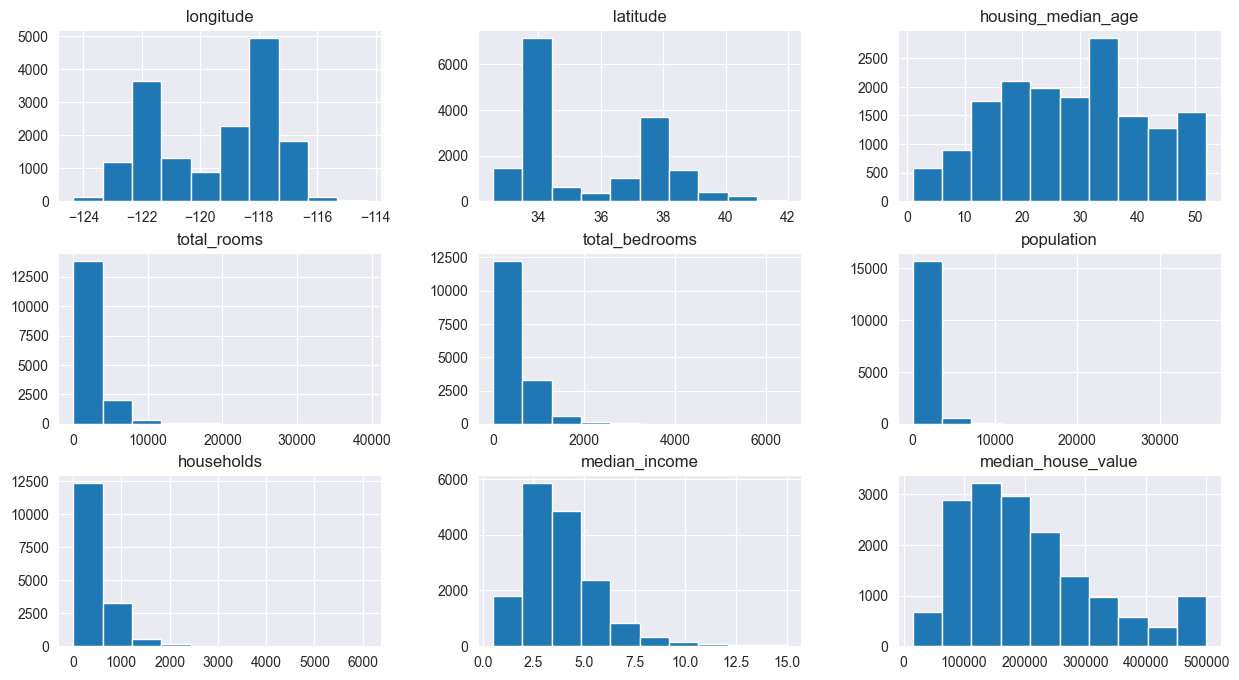

In [85]:
train_data.hist(figsize=(15,8))

<Axes: >

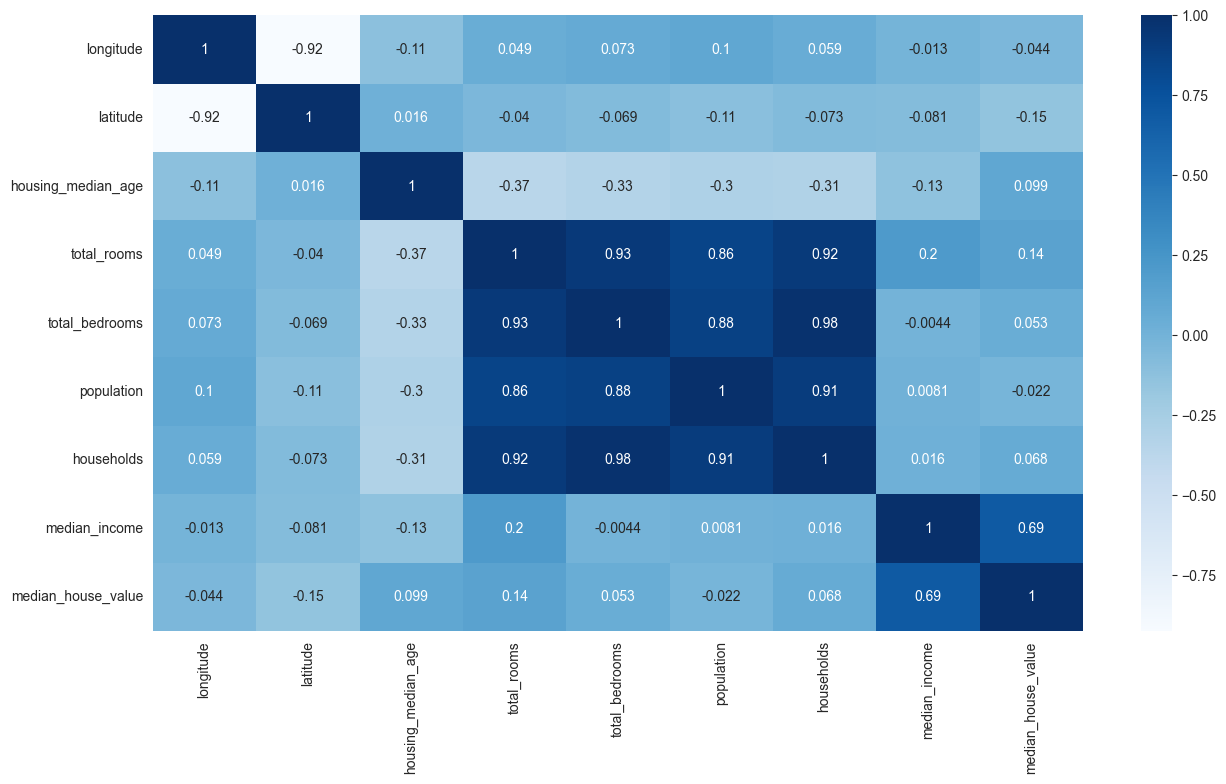

In [86]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='Blues')

In [87]:
print(train_data['total_rooms'].max())
print(train_data['total_rooms'].min())

39320.0
2.0


In [88]:

train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)

In [89]:
print(train_data['total_rooms'].max())
print(train_data['total_rooms'].min())

10.579514006287654
1.0986122886681098


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

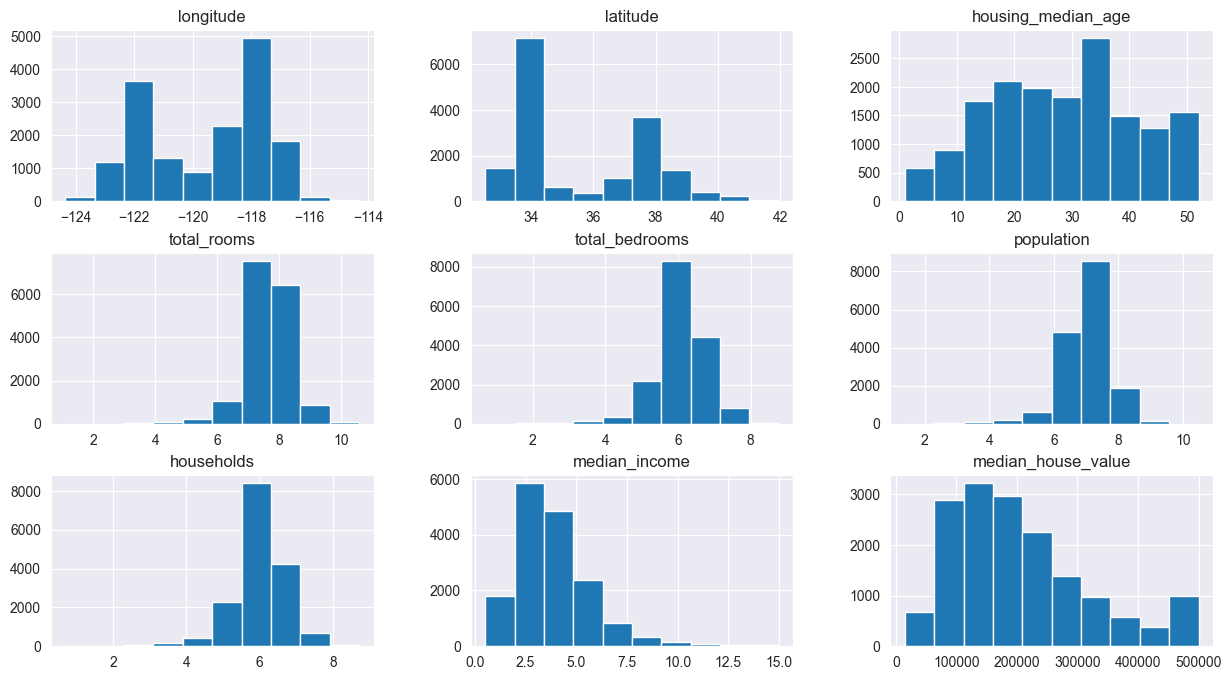

In [90]:
train_data.hist(figsize=(15,8))

In [91]:
print(train_data.ocean_proximity.value_counts());

ocean_proximity
<1H OCEAN     7203
INLAND        5201
NEAR OCEAN    2121
NEAR BAY      1817
ISLAND           4
Name: count, dtype: int64


In [92]:
    train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1);

In [93]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
264,-122.21,37.78,44.0,7.455877,6.028279,7.123673,5.976351,2.3125,102800.0,False,False,False,True,False
6120,-117.91,34.12,41.0,7.891331,6.361302,7.723120,6.385194,3.7846,145500.0,True,False,False,False,False
10732,-117.87,33.60,33.0,8.045909,6.401917,7.052721,6.317165,5.2949,500001.0,True,False,False,False,False
5759,-118.29,34.17,17.0,8.256607,6.972606,8.002025,6.901737,2.3482,255400.0,True,False,False,False,False
5741,-118.25,34.17,52.0,7.334982,5.680173,6.448889,5.620401,5.1242,372900.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8036,-118.14,33.84,44.0,8.020928,6.429719,7.183112,6.410175,4.4286,254900.0,True,False,False,False,False
18077,-122.02,37.28,25.0,8.142645,6.061457,7.089243,6.021023,9.3464,500001.0,True,False,False,False,False
14091,-117.11,32.76,28.0,7.284821,5.986452,6.511745,5.837730,1.9799,122700.0,False,False,False,False,True
4638,-118.29,34.06,46.0,7.473069,6.920672,7.907284,6.777647,2.1637,350000.0,True,False,False,False,False


plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='Blues')

<Axes: xlabel='latitude', ylabel='longitude'>

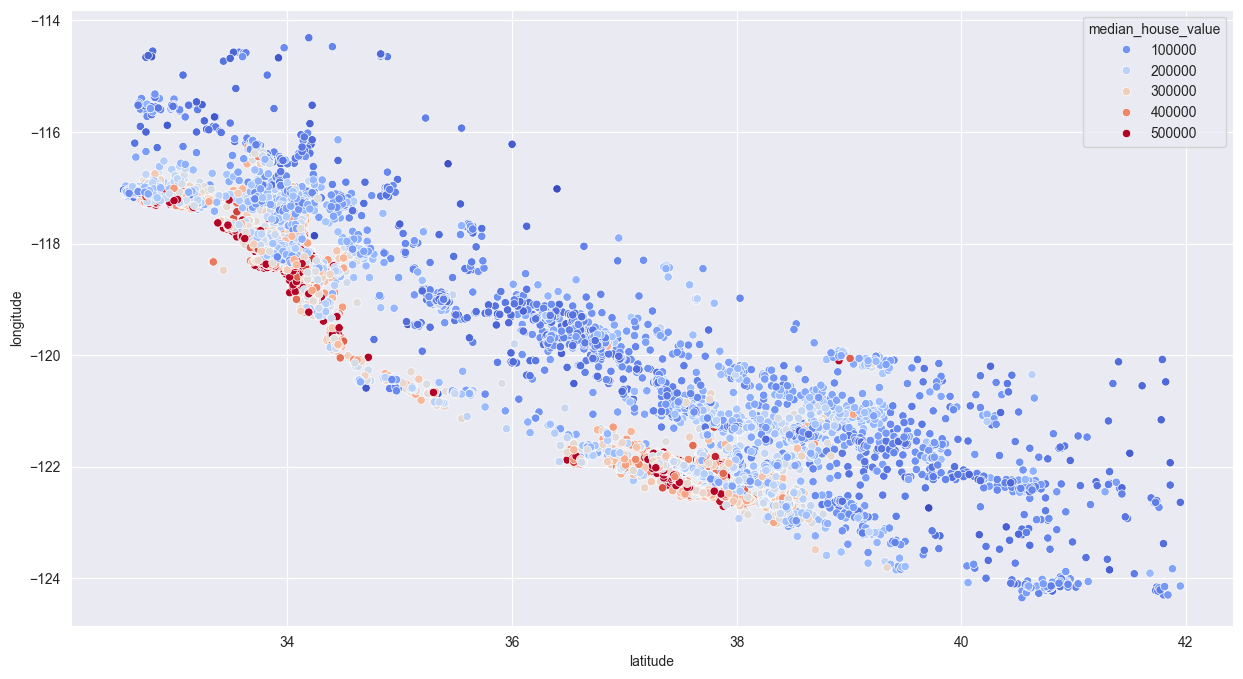

In [94]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [95]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']    

<Axes: >

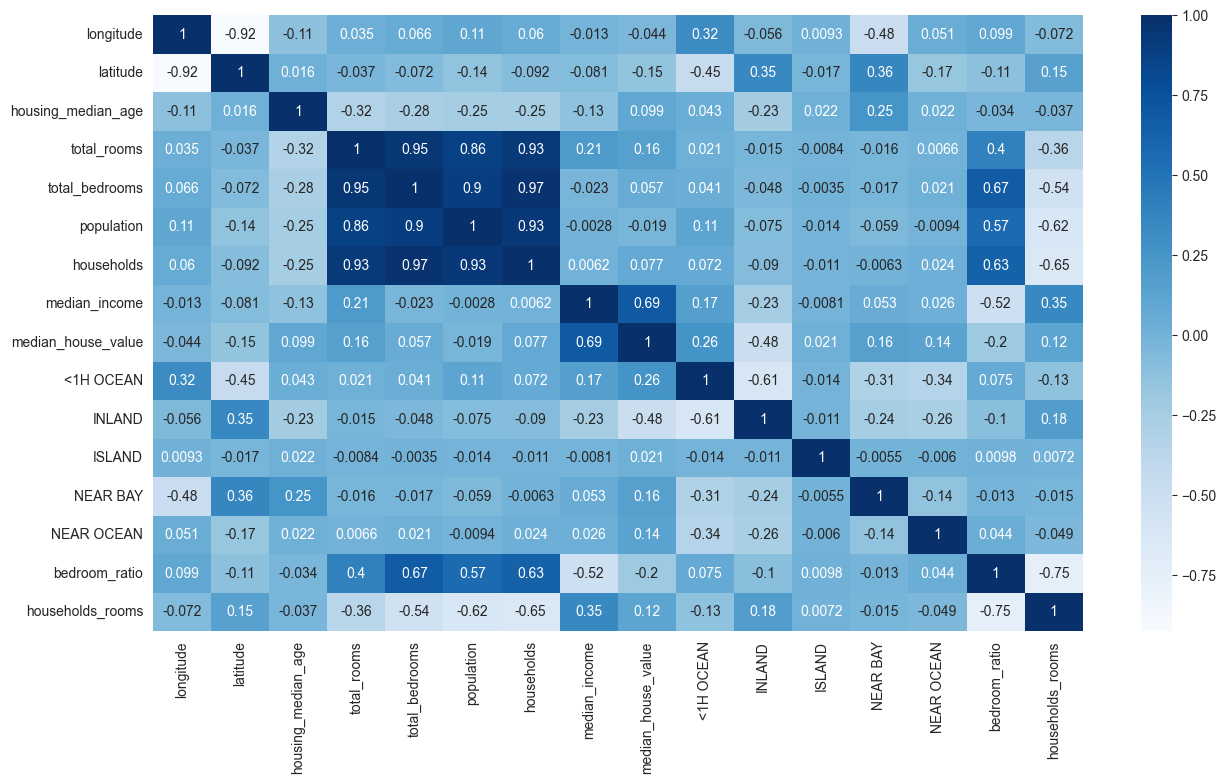

In [96]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='Blues')

In [97]:
test_data = X_test.join(Y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [98]:
from sklearn.linear_model import LinearRegression

X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train, Y_train)
reg_score = reg.score(X_test, Y_test)
print("Linearna regresija - Koeficijent determinacije (R^2):", reg_score)

Linearna regresija - Koeficijent determinacije (R^2): 0.6815528097858076


In [99]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, Y_train)
forest_score = forest.score(X_test, Y_test)

print(" Random Forest Regresija - Koeficijent determinacije (R^2):", forest_score)

 Random Forest Regresija - Koeficijent determinacije (R^2): 0.8249543431536711


In [100]:
from sklearn.linear_model import Ridge


ridge_reg = Ridge(alpha=1.0) 
ridge_reg.fit(X_train, Y_train)

ridge_score = ridge_reg.score(X_test, Y_test)
print("Ridge Regresija - Koeficijent determinacije (R^2):", ridge_score)

Ridge Regresija - Koeficijent determinacije (R^2): 0.6808141235500913


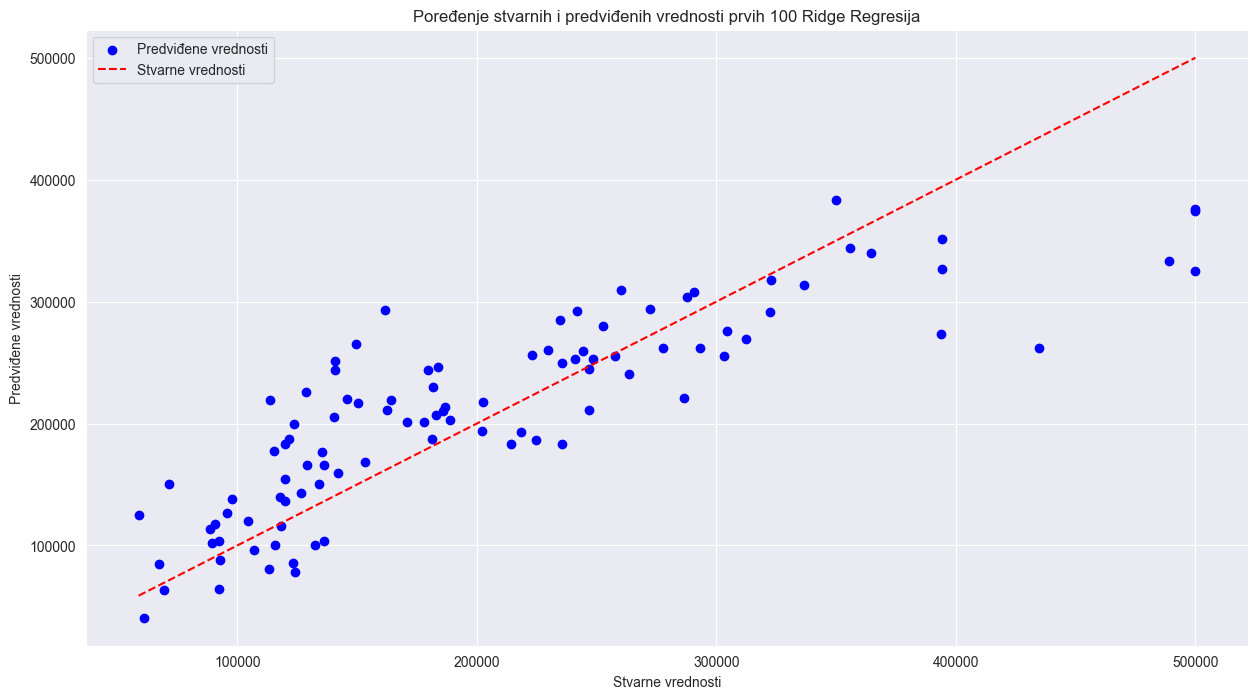

In [101]:
ridge_predicted_prices = ridge_reg.predict(X_test[:100]);
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.scatter(Y_test[:100], ridge_predicted_prices, color='blue', label='Predviđene vrednosti')
plt.plot([Y_test[:100].min(), Y_test[:100].max()], [Y_test[:100].min(), Y_test[:100].max()], color='red', linestyle='--', label='Stvarne vrednosti')
plt.xlabel('Stvarne vrednosti')
plt.ylabel('Predviđene vrednosti')
plt.title('Poređenje stvarnih i predviđenih vrednosti prvih 100 Ridge Regresija')
plt.legend()
plt.show()


In [102]:
import lightgbm as lgb


lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit(X_train, Y_train)

lgb_score = lgb_reg.score(X_test, Y_test)
print("LightGBM Regresija - Koeficijent determinacije (R^2):", lgb_score)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2355
[LightGBM] [Info] Number of data points in the train set: 16346, number of used features: 14
[LightGBM] [Info] Start training from score 207015.103145
LightGBM Regresija - Koeficijent determinacije (R^2): 0.8365412034769583


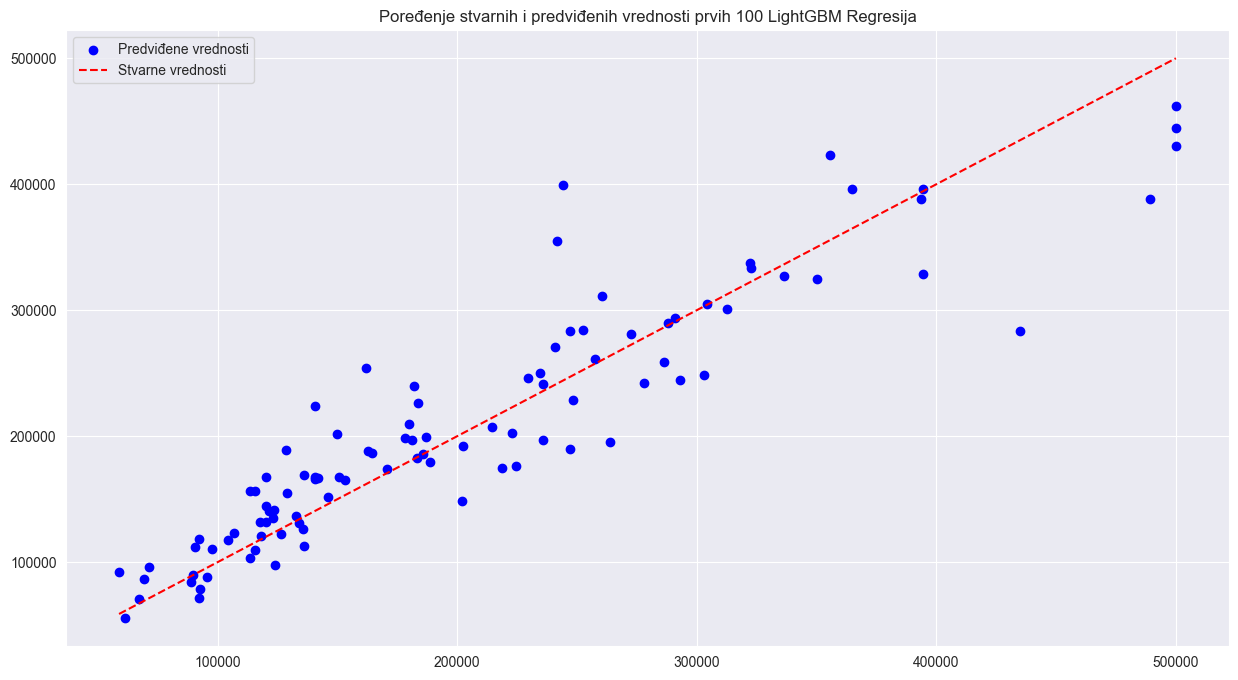

In [103]:
lgb_predicted_prices = lgb_reg.predict(X_test[:100])
plt.figure(figsize=(15, 8))
plt.scatter(Y_test[:100], lgb_predicted_prices, color='blue', label='Predviđene vrednosti')
plt.plot([Y_test[:100].min(), Y_test[:100].max()], [Y_test[:100].min(), Y_test[:100].max()], color='red', linestyle='--', label='Stvarne vrednosti')


plt.title('Poređenje stvarnih i predviđenih vrednosti prvih 100 LightGBM Regresija')
plt.legend()
plt.show()

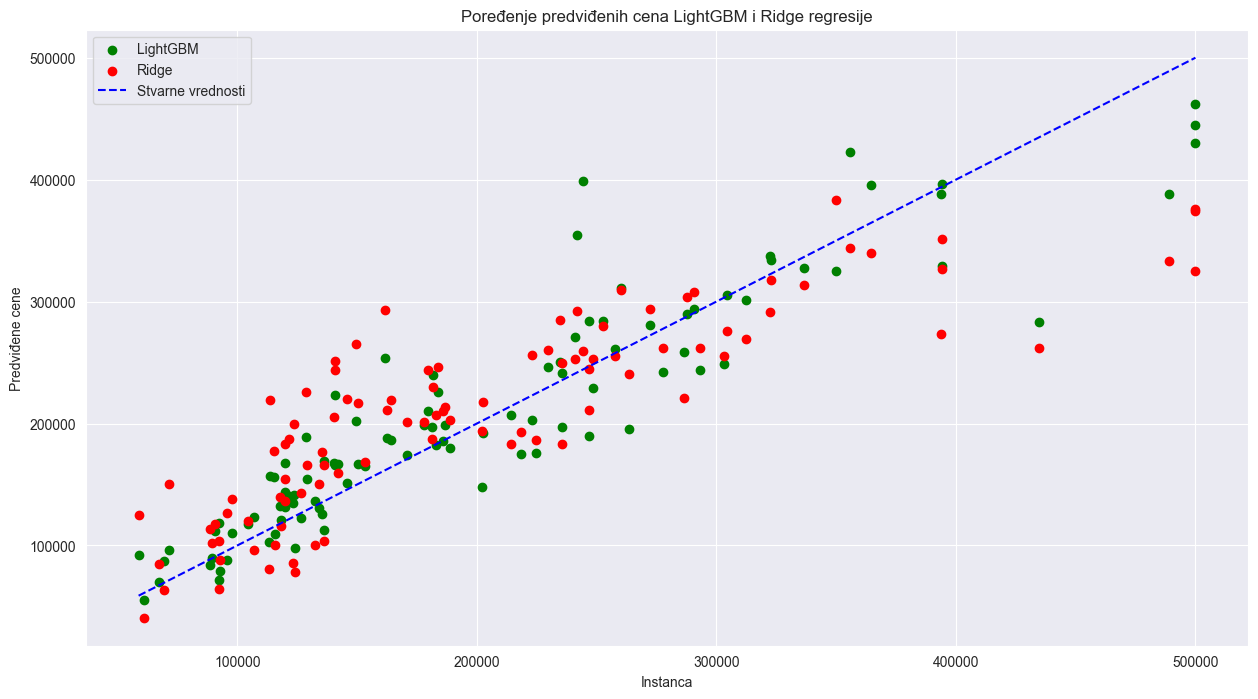

In [104]:
lgb_predicted_prices_subset = lgb_reg.predict(X_test[:100])
ridge_predicted_prices_subset = ridge_reg.predict(X_test[:100])
plt.figure(figsize=(15, 8))
plt.scatter(Y_test[:100], lgb_predicted_prices_subset, color='green', label='LightGBM')
plt.scatter(Y_test[:100], ridge_predicted_prices_subset, color='red', label='Ridge')
plt.plot([Y_test[:100].min(), Y_test[:100].max()], [Y_test[:100].min(), Y_test[:100].max()], color='blue', linestyle='--', label='Stvarne vrednosti')
plt.xlabel('Instanca')
plt.ylabel('Predviđene cene')
plt.title('Poređenje predviđenih cena LightGBM i Ridge regresije')
plt.grid(True)
plt.legend()
plt.show()

In [105]:
relative_errors = abs(Y_test[:100] - lgb_predicted_prices) / Y_test[:100]

average_relative_error = (sum(relative_errors) / len(relative_errors)) * 100

print("LightGBM Prosečna relativna greška cene: {:.2f}%".format(average_relative_error))

LightGBM Prosečna relativna greška cene: 15.57%


In [106]:
relative_errors = abs(Y_test[:100] - ridge_predicted_prices) / Y_test[:100]

average_relative_error = (sum(relative_errors) / len(relative_errors)) * 100

print("Regresija Prosečna relativna greška cene: {:.2f}%".format(average_relative_error))

Regresija Prosečna relativna greška cene: 25.14%
